In [149]:
import torch
import torch.nn as nn
from matplotlib import pyplot as plt
import numpy as np

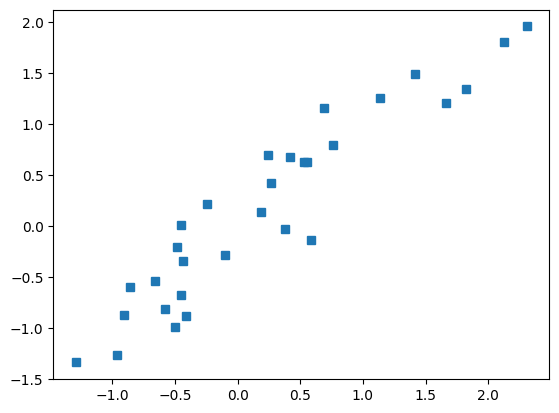

In [150]:
N=30
x=torch.randn(N,1)
y=x+torch.randn(N,1)/3

plt.plot(x,y,'s')
plt.show()

In [151]:
Ann_reg=nn.Sequential(
    nn.Linear(1,1),
    nn.ReLU(),
    nn.Linear(1,1)
)
Ann_reg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [152]:
lr=0.05
loss_fun=nn.MSELoss()
optimizer=torch.optim.SGD(Ann_reg.parameters(),lr)

In [153]:
num_epochs=500
losses=torch.zeros(num_epochs)


In [154]:
for epochi in range(num_epochs):

  yhat=Ann_reg(x)

  loss=loss_fun(yhat,y)
  losses[epochi]=loss

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


In [155]:
predictions=Ann_reg(x)
test_loss=(predictions-y).pow(2).mean()
test_loss
test_loss.detach()

tensor(0.1004)

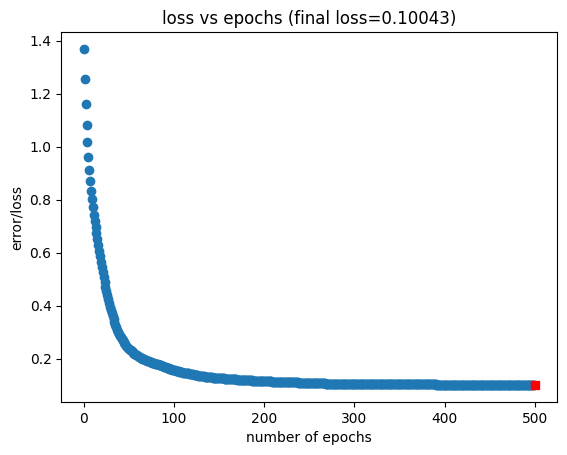

In [156]:
plt.plot(losses.detach(),'o')
plt.plot(num_epochs,test_loss.detach(),'rs')
plt.xlabel("number of epochs")
plt.ylabel("error/loss")
plt.title("loss vs epochs (final loss=%g)" %test_loss.detach())
plt.show()

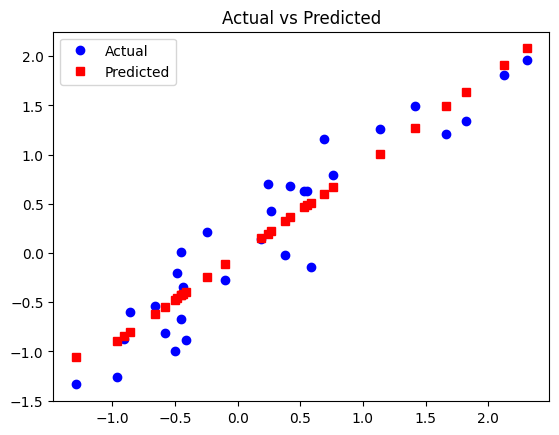

In [157]:
plt.plot(x,y,'bo')
plt.plot(x,predictions.detach(),'rs')

plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

In [161]:
np.corrcoef(y.T,predictions.detach().T)

array([[1.       , 0.9381036],
       [0.9381036, 1.       ]])